In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## EDA

In [4]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.shape

(3276, 10)

In [6]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## Handling null values with KNN imputer

In [8]:
from sklearn.impute import KNNImputer

In [9]:
impute = KNNImputer()

In [10]:
df1 = impute.fit_transform(df)

In [11]:
df = pd.DataFrame(df1, columns=df.columns)

In [12]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,364.091541,392.449580,19.903225,64.327280,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,327.357588,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,325.952434,402.883113,11.168946,77.488213,4.708658,1.0


In [13]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Data visulaization

<AxesSubplot:>

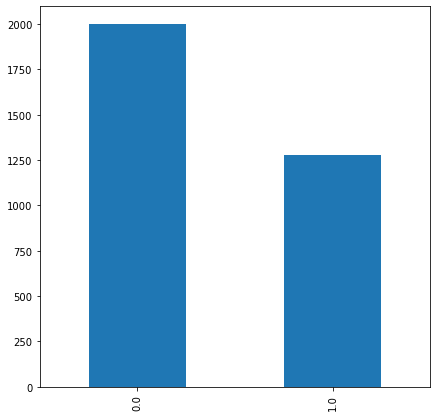

In [14]:
plt.figure(figsize=(7,7))
df["Potability"].value_counts().plot(kind ="bar")

<AxesSubplot:ylabel='Potability'>

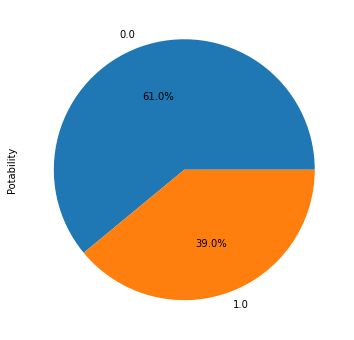

In [15]:
plt.figure(figsize=(9,6))
df['Potability'].value_counts().plot(kind='pie',autopct="%1.1f%%")

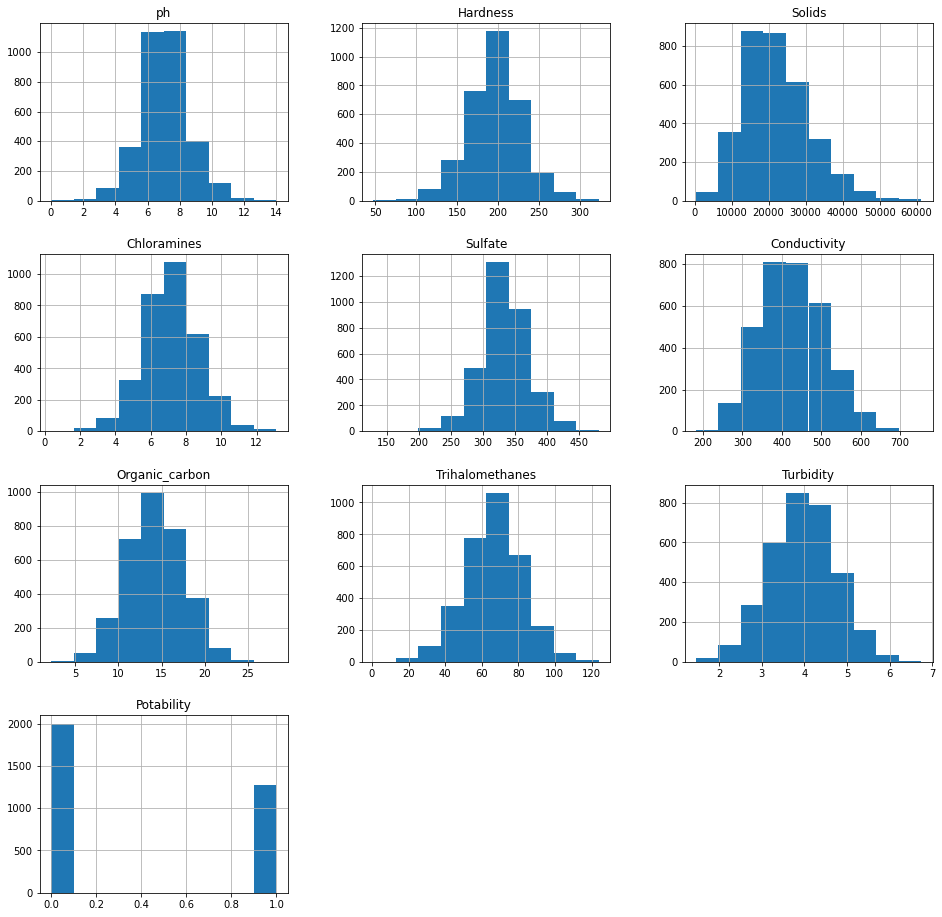

In [16]:
df.hist(figsize=(16,16))
plt.show()

In [17]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.080383,-0.100512,-0.028970,0.027832,0.018234,0.035420,-0.002337,-0.032971,-0.002920
Hardness,0.080383,1.000000,-0.046899,-0.030054,-0.101627,-0.023915,0.003610,-0.014199,-0.014449,-0.013837
Solids,-0.100512,-0.046899,1.000000,-0.070148,-0.190596,0.013831,0.010242,-0.003769,0.019546,0.033743
Chloramines,-0.028970,-0.030054,-0.070148,1.000000,0.033203,-0.020486,-0.012653,0.014224,0.002363,0.023779
Sulfate,0.027832,-0.101627,-0.190596,0.033203,1.000000,-0.014102,0.027612,-0.024026,-0.012605,-0.022108
Conductivity,0.018234,-0.023915,0.013831,-0.020486,-0.014102,1.000000,0.020966,0.001564,0.005798,-0.008128
Organic_carbon,0.035420,0.003610,0.010242,-0.012653,0.027612,0.020966,1.000000,-0.012044,-0.027308,-0.030001
Trihalomethanes,-0.002337,-0.014199,-0.003769,0.014224,-0.024026,0.001564,-0.012044,1.000000,-0.024393,0.006918
Turbidity,-0.032971,-0.014449,0.019546,0.002363,-0.012605,0.005798,-0.027308,-0.024393,1.000000,0.001581
Potability,-0.002920,-0.013837,0.033743,0.023779,-0.022108,-0.008128,-0.030001,0.006918,0.001581,1.000000


<AxesSubplot:>

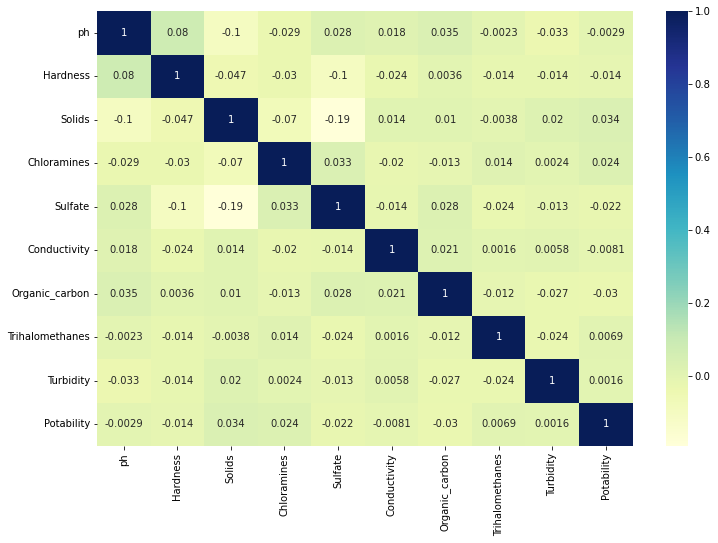

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

## Outlier detection

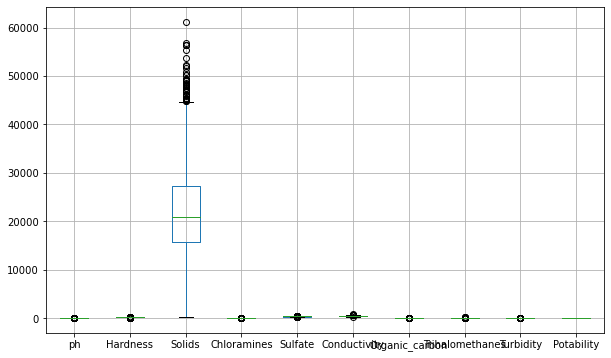

In [19]:
df.boxplot(figsize=(10,6))
plt.show()

In [20]:
X = df.drop('Potability',axis=1)
y = df['Potability']

In [21]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [22]:
over_sampler = RandomOverSampler()

In [23]:
X_oversampled,y_oversampled = over_sampler.fit_resample(X,y)

In [24]:
counter = 0
o_df = pd.DataFrame()
for i in list(df.columns)[0:9]:
    o_df[i]=X_oversampled[i]
    counter += 1
    
o_df["Potability"] = y_oversampled
df = o_df.copy()
Counter(y_oversampled)


Counter({0.0: 1998, 1.0: 1998})

<AxesSubplot:ylabel='Potability'>

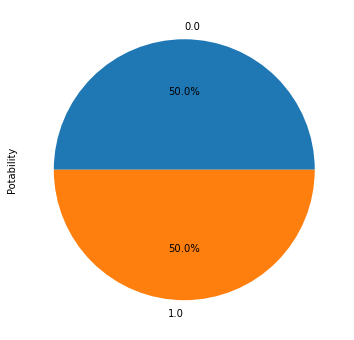

In [25]:
plt.figure(figsize=(9,6))
df['Potability'].value_counts().plot(kind='pie',autopct="%1.1f%%")

In [26]:
df['Potability'].value_counts()

0.0    1998
1.0    1998
Name: Potability, dtype: int64

In [27]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3991,9.318614,317.338124,24497.873935,7.597452,357.167217,476.510384,12.032377,68.599830,4.642719,1.0
3992,6.549125,194.276857,7412.798059,5.836980,354.821194,361.037238,11.672191,57.316977,4.421059,1.0
3993,7.526680,192.167096,38468.413584,6.616368,290.641740,449.317534,13.055894,58.768613,4.148223,1.0
3994,8.716820,153.980034,11734.448857,7.123611,352.309377,447.028077,12.736044,39.927521,3.205129,1.0


In [28]:
X = df.drop('Potability',axis=1)
y = df['Potability']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Model training, testing and evauation

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)

In [32]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [33]:
df= SVC()
param_grid = [
              {'kernel':['rbf'],
               'gamma':[0.5,0.1,0.01],
               'C':[10,0.1,0.001,0.0001] 
              }
             ]
gsv = GridSearchCV(df,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01], 'kernel': ['rbf']}])

In [34]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7506210815047021)

In [35]:
df = SVC(C= 10, gamma = 0.5)
df.fit(X_train, y_train)
y_pred = df.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 77.75


In [36]:
confusion_matrix(y_test, y_pred)

array([[393,   0],
       [178, 229]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82       393
         1.0       1.00      0.56      0.72       407

    accuracy                           0.78       800
   macro avg       0.84      0.78      0.77       800
weighted avg       0.85      0.78      0.77       800



In [38]:
import pickle
pickle_out = open("modeldep.pkl","wb")
pickle.dump(df,pickle_out)
pickle_out.close()

In [39]:
#dump(model,open('modeldep.sav','wb'))

In [40]:
#pip install streamlit

In [41]:
#pip install lightgbm